In [29]:
import pandas as pd
train_data =pd.read_csv('../src/data/application_train.csv')
test_data = pd.read_csv('../src/data/application_test.csv')

In [30]:
train_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Irrtional negative values, may be because the logic itself was to subtract NOW time from DOB time
train_data.loc[:,['DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].sample(10) / -365

,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
40585,26.794521,6.723288,5.005479
225753,27.495890,7.287671,3.572603
95991,40.405479,13.931507,0.835616
268769,57.369863,12.049315,0.013699
282169,45.460274,0.350685,0.964384
141514,44.841096,12.849315,2.353425
211499,39.884932,0.087671,3.736986
75670,35.983562,11.736986,2.720548
231422,30.271233,9.164384,-0.000000
179204,27.495890,1.791781,0.890411


In [32]:
missing_values = (train_data.isnull().sum() / len(train_data)) * 100
missing_values = missing_values.drop(missing_values[missing_values == 0].index).sort_values(ascending=False)
missing_values

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64

In [33]:
train_data.dropna(thresh=train_data.shape[0] * 0.4, axis=1, inplace=True) 
train_data.shape

(307511, 105)

In [34]:
# Check for duplicate rows
print(train_data.duplicated().sum())

0


In [35]:
# Check for missing values
print(train_data.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 105, dtype: int64


In [36]:
cat_list = []
dis_num_list = []
num_list = []
 #Sélectionner les données sans la colonne "ma_colonne"
data_without_target= train_data.drop(columns=["TARGET"])

for i in data_without_target.columns.tolist():
    if train_data[i].dtype == 'object':
        cat_list.append(i)
    elif train_data[i].nunique() < 25:
        dis_num_list.append(i)
    else:
        num_list.append(i)

In [37]:
from sklearn.impute import SimpleImputer
#Categorical
train_data[cat_list] = SimpleImputer(strategy='most_frequent').fit_transform(train_data[cat_list])

#Discrete
train_data[dis_num_list] = SimpleImputer(strategy='most_frequent').fit_transform(train_data[dis_num_list])

# continuous 
train_data[num_list] = SimpleImputer(strategy='median').fit_transform(train_data[num_list])

In [38]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Check for missing values
print(train_data.isnull().sum())

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 105, dtype: int64


In [40]:
# one-hot encoding pour les variables categorielles
train_data =pd.get_dummies(train_data, columns= cat_list)
train_data

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002.0,1,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0,0,0,0,0,0,1,0,1,0
1,100003.0,0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0,1,0,0,0,0,0,0,1,0
2,100004.0,0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0,0,0,0,0,1,0,0,1,0
3,100006.0,0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0,0,0,0,0,1,0,0,1,0
4,100007.0,0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,...,0,0,0,0,0,0,1,0,1,0
307507,456252.0,0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,365243.0,...,0,0,0,0,0,0,1,0,1,0
307508,456253.0,0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,...,0,0,0,0,0,1,0,0,1,0
307509,456254.0,1,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,...,0,0,0,0,0,0,1,0,1,0


In [41]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np 
# Find correlations
corr = train_data.corr()
# Select highly correlated features
high_corr = corr[((corr > 0.05) | (corr < -0.05)) & (corr < 1) ]
# For each feature, list its correlated feature
correlated_columns = {}
for col in high_corr.columns:
    correlated_features = high_corr.columns[(~high_corr[col].isna())].tolist()
    correlated_features = list(set(correlated_features).difference(set(correlated_columns.keys())))
    correlated_columns[col] = correlated_features
# From correlated features with TARGET, select their top 3 correlated features
selected_features = correlated_columns["TARGET"]
for feature in selected_features.copy():
    correlated_correlated_features = high_corr[feature].abs().sort_values(ascending=False)

    features_to_select = correlated_correlated_features[correlated_correlated_features < 90][:3].index.tolist()
    selected_features.extend(features_to_select)
X = train_data.loc[:, np.unique(selected_features)].drop(columns="TARGET")
y = train_data.loc[:, "TARGET"]



In [43]:
X

,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_EMP_PHONE,...,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Managers,ORGANIZATION_TYPE_XNA,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY
0,1.0,0,1,-9461.0,-2120.0,-1134.0,0.083037,0.262949,0.139376,1.0,...,0,1,0,0,0,0.018801,2.0,2.0,0.0,0.0
1,0.0,1,0,-16765.0,-291.0,-828.0,0.311267,0.622246,0.535276,1.0,...,0,0,1,0,0,0.003541,1.0,1.0,0.0,0.0
2,0.0,0,1,-19046.0,-2531.0,-815.0,0.505998,0.555912,0.729567,1.0,...,0,1,0,0,0,0.010032,2.0,2.0,0.0,0.0
3,1.0,1,0,-19005.0,-2437.0,-617.0,0.505998,0.650442,0.535276,1.0,...,0,1,0,0,0,0.008019,2.0,2.0,0.0,0.0
4,0.0,0,1,-19932.0,-3458.0,-1106.0,0.505998,0.322738,0.535276,1.0,...,0,1,1,0,0,0.028663,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0,1,-9327.0,-1982.0,-273.0,0.145570,0.681632,0.535276,1.0,...,0,1,0,0,0,0.032561,1.0,1.0,0.0,0.0
307507,1.0,1,0,-20775.0,-4090.0,0.0,0.505998,0.115992,0.535276,0.0,...,1,0,0,0,1,0.025164,2.0,2.0,0.0,0.0
307508,1.0,1,0,-14966.0,-5150.0,-1909.0,0.744026,0.535722,0.218859,1.0,...,0,1,0,1,0,0.005002,3.0,3.0,0.0,1.0
307509,0.0,1,0,-11961.0,-931.0,-322.0,0.505998,0.514163,0.661024,1.0,...,0,0,0,0,0,0.005313,2.0,2.0,1.0,1.0


In [44]:
X.columns 

Index(['AMT_REQ_CREDIT_BUREAU_YEAR', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_EMP_PHONE',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'LIVE_CITY_NOT_WORK_CITY',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_Working', 'OCCUPATION_TYPE_Core staff',
       'OCCUPATION_TYPE_Managers', 'ORGANIZATION_TYPE_XNA',
       'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY'],
      dtype='object')

In [45]:
pip install xgboost

In [46]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model
model = xgb.XGBClassifier(seed = 123,
    n_jobs=-1,
    base_score=0.2,
    booster= 'gbtree',
    gamma= 0.3,
    learning_rate= 0.1,
    reg_alpha= 1,
    reg_lambda= 0.50,)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1 Score: {:.2f}".format(f1))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:22:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 91.96%
Precision: 52.07%
Recall: 1.27%
F1 Score: 0.02


In [47]:
train_data[train_data['TARGET'] == 1]

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002.0,1,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0,0,0,0,0,0,1,0,1,0
26,100031.0,1,0.0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724.0,-2628.0,...,0,0,0,0,0,0,0,1,0,1
40,100047.0,1,0.0,202500.0,1193580.0,35028.0,855000.0,0.025164,-17482.0,-1262.0,...,0,0,0,0,0,0,1,0,1,0
42,100049.0,1,0.0,135000.0,288873.0,16258.5,238500.0,0.007305,-13384.0,-3597.0,...,0,0,0,0,0,1,0,0,1,0
81,100096.0,1,0.0,81000.0,252000.0,14593.5,252000.0,0.028663,-24794.0,365243.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186.0,1,1.0,207000.0,450000.0,32746.5,450000.0,0.020246,-9918.0,-3048.0,...,0,0,0,0,0,0,1,0,1,0
307475,456215.0,1,1.0,144000.0,1303200.0,46809.0,1125000.0,0.007330,-13416.0,-2405.0,...,0,0,0,0,0,1,0,0,1,0
307481,456225.0,1,0.0,225000.0,297000.0,19975.5,297000.0,0.008575,-20644.0,-3147.0,...,0,0,0,0,0,1,0,0,1,0
307489,456233.0,1,0.0,225000.0,521280.0,23089.5,450000.0,0.014464,-16471.0,-286.0,...,0,0,0,0,0,0,1,0,0,1


In [48]:
from sklearn.impute import SimpleImputer
#Categorical
test_data[cat_list] = SimpleImputer(strategy='most_frequent').fit_transform(test_data[cat_list])

#Discrete
test_data[dis_num_list] = SimpleImputer(strategy='most_frequent').fit_transform(test_data[dis_num_list])

# continuous 
test_data[num_list] = SimpleImputer(strategy='median').fit_transform(test_data[num_list])
# one-hot encoding pour les variables categorielles
test_data =pd.get_dummies(test_data, columns= cat_list)

# supprimer les colonnes qui sontt pas dans le train 
test_data.drop(columns=[col for col in test_data.columns if col not in X.columns], inplace=True)

In [49]:
test_data

,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,...,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Managers,ORGANIZATION_TYPE_XNA
0,0.018850,-19241.0,-812.0,1.0,2.0,2.0,0.0,0.0,0.0,0.752614,...,1,0,0,0,1,1,0,0,0,0
1,0.035792,-18064.0,-1623.0,1.0,2.0,2.0,0.0,0.0,0.0,0.564990,...,1,0,0,0,1,0,1,0,0,0
2,0.019101,-20038.0,-3503.0,1.0,2.0,2.0,0.0,0.0,0.0,0.506771,...,0,1,0,0,1,1,0,0,0,0
3,0.026392,-13976.0,-4208.0,1.0,2.0,2.0,0.0,0.0,0.0,0.525734,...,1,0,0,0,1,0,1,0,0,0
4,0.010032,-13040.0,-4262.0,1.0,2.0,2.0,0.0,1.0,1.0,0.202145,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.002042,-19970.0,-3399.0,1.0,3.0,3.0,0.0,0.0,0.0,0.506771,...,1,0,0,0,1,0,1,0,0,0
48740,0.035792,-11186.0,-3003.0,1.0,2.0,2.0,0.0,1.0,1.0,0.506771,...,1,0,1,0,0,0,1,0,0,0
48741,0.026392,-15922.0,-1504.0,1.0,2.0,2.0,0.0,0.0,0.0,0.733503,...,0,1,1,0,0,0,1,0,0,0
48742,0.018850,-13968.0,-1364.0,1.0,2.0,2.0,0.0,1.0,1.0,0.373090,...,1,0,1,0,0,1,0,0,1,0


In [50]:


# faire des prédictions sur les données de test avec le modèle entraîné
y_pred = model.predict(X_test)



In [51]:
df = pd.DataFrame(y_pred, columns=['Prediction'])
df[df['Prediction'] == 1]

,Prediction
2238,1
2404,1
2779,1
2940,1
2957,1
...,...
58821,1
59645,1
59747,1
61086,1


In [52]:
pip install SHAP

Note: you may need to restart the kernel to use updated packages.


In [53]:
import shap
#Build a TreeExplainer and compute Shaplay Values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap_values

100%|===================| 61491/61503 [08:43<00:00]        

.values =
array([[-2.29613656e-02,  9.47645231e-02,  6.19560232e-02, ...,
        -6.38453333e-03, -2.99796028e-02,  1.13324384e-02],
       [ 8.69120759e-03, -5.70188559e-02, -1.33130286e-02, ...,
         1.34204452e-01, -3.69363546e-02, -4.43994154e-03],
       [ 1.28148954e-02, -6.93345216e-02, -2.72539721e-02, ...,
        -2.73849248e-03, -2.31878779e-02, -3.31027917e-03],
       ...,
       [ 4.00565472e-05,  1.86992988e-01,  4.91228615e-02, ...,
        -5.33330923e-04, -3.29598875e-02, -1.09320009e-02],
       [ 2.97368729e-02,  2.53977436e-01,  7.70893205e-02, ...,
        -1.81845986e-03, -3.31532031e-02, -4.54281893e-03],
       [ 4.58652966e-02, -5.41385452e-02, -3.54141693e-02, ...,
        -8.25015216e-03, -1.97536059e-02, -6.13027652e-03]])

.base_values =
array([-2.55663458, -2.55663458, -2.55663458, ..., -2.55663458,
       -2.55663458, -2.55663458])

.data =
array([[1., 0., 1., ..., 2., 0., 1.],
       [3., 1., 0., ..., 3., 0., 0.],
       [3., 1., 0., ..., 2., 0., 0

In [54]:
shap.initjs()

In [64]:
# Visualize explanations for a specific point of your data set
shap.plots.force(shap_values[5009])

In [67]:
import matplotlib.pyplot as plt
import os
# Visualize explanations for all points of your data set at once
shap.force_plot(explainer.expected_value, shap_values.values[0:900,:],X.iloc[0:900,:], plot_cmap="DrDb")


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


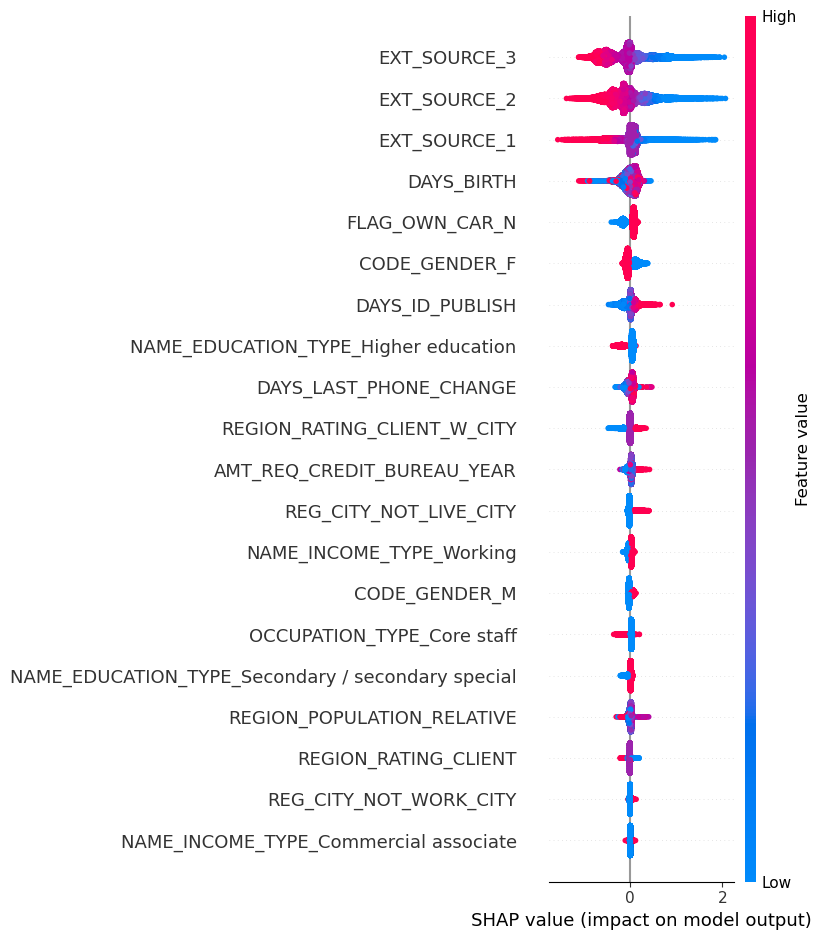

In [ ]:
        # Visualize a summary plot for each class on the whole dataset
shap.summary_plot(shap_values, X_test, class_names=model.classes_)

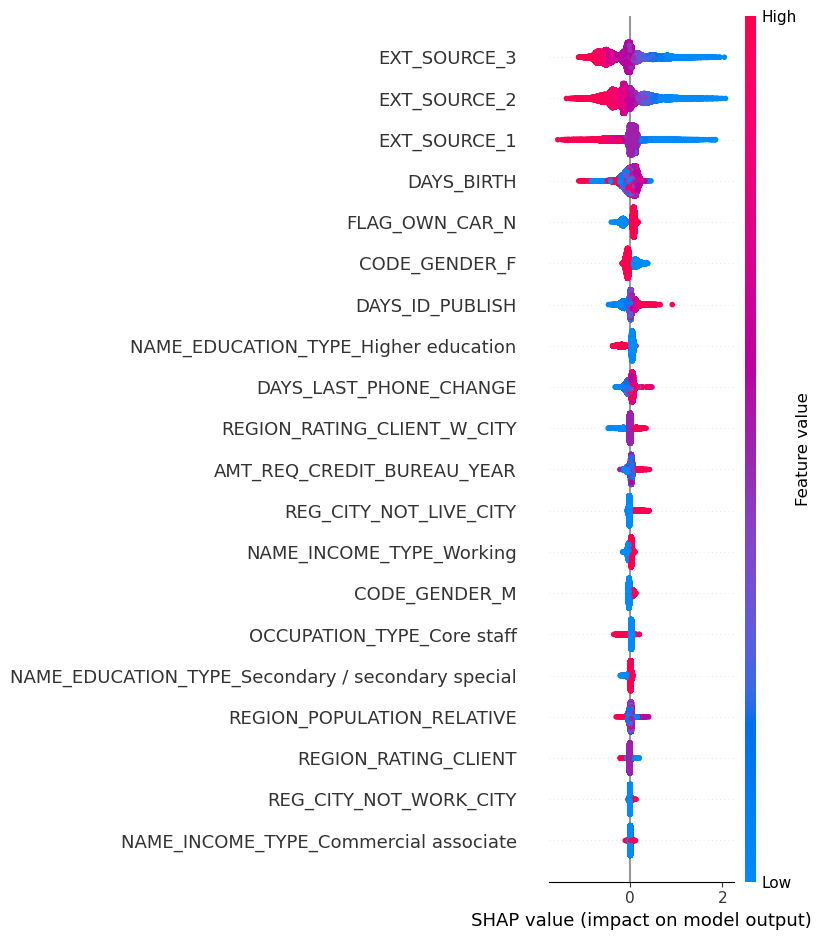

In [70]:
output_folder='../output/figures/'
f= plt.gcf()
# Visualize explanations for a specific point of your data set
pathe = os.path.join(output_folder, 'explanationSpecificPoint.html')
shap.save_html(pathe, shap.plots.force(shap_values[5009]))
# Visualize explanations for all points of your data set at once
pathe = os.path.join(output_folder, 'explanationAllPoint.html')
shap.save_html(pathe, shap.force_plot(explainer.expected_value, shap_values.values[0:900,:],X.iloc[0:900,:], plot_cmap="DrDb"))
# Visualize a summary plot for each class on the whole dataset
shap.summary_plot(shap_values, X_test, class_names=model.classes_)
f.savefig(os.path.join(output_folder, 'SummaryPlotEachClass.png'))